 # Opis notatnika
 Po pobraniu danych z zewnętrznego serwisu, a następnie załadowaniu ich do naszej wewnętrznej (prawie firmowej) bazy, czas na ich analizę oraz eksplorację.
 Ponieważ zakładamy, że pracujemy z tym zbiorem pierwszy raz, warto przejrzeć go pod dość szerokim kątem, aby nabrać świadomości, jakie informacje są tam ukryte i co stanowi potencjalną wartość biznesową.

 Eksplorację zaczniemy od centralnej bazy danych `flight`, w której nastawimy się w szczególności na zmienną `dep_delay` (za dokumentacją u [źródła](https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations?resource=download&select=raw_data_documentation.txt)), która informuje o wysokości opóźnienia odlotu samolotu.
 Wykonując kolejne kroki, najpierw odpowiednio przygotujemy nasz wyjściowy zbiór do analizy, by później zacząć go wzbogacać o dodatkowe informacje, np. pogodowe.

 Dzięki wyciągnięciu wniosków z danych, które otrzymaliśmy, będziemy mogli zaproponować system raportowania wspomagający biznes, czy zdefiniować dalsze kroki, które usprawnią działania lotnisk.

 Powodzenia!

 > Ze względu na objętość zadań w tym obszarze, ten krok podzielony został na kilka mniejszych części.
 
 W tej części warsztatu wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 # Konfiguracja
 Uzupełnij implementajcę procedury `load_table_from_db`, która będzie odpowiedzialna za
 pobieranie danych z bazy danych oraz zwrócenie ramki do dalszej pracy.

 W trakcie pracy nad jej implementacją możesz wspomóc się następującymi materiałami:
 - `read_sql` - dokumentacja techniczna metody: [klik](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html),
 - `SQL - analiza danych -> Zjazd 1 - materiał dodatkowe -> Export danych -> Python`

 > **Uwaga:**  
 > Metoda powinna tylko pobierać dane z bazy, nie implementuj tutaj dodatkowej logiki.

 Tutaj zaimportuj wymagane biblioteki

In [304]:
import urllib.parse
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
import matplotlib.pyplot as plt

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [2]:
username = 'postgres'
password = 'SQLisFun'

host = 'localhost'
database = 'airlines'
port = None

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [3]:
url= URL.create(
    "postgresql",
    username=username,
    password=password, 
    host=host,
    database=database,
)

engine = create_engine(url)

 Tutaj uzupełnij implementację metody `read_sql_table`

In [4]:
def read_sql_table(table_name):
    return pd.read_sql(table_name, con=engine)

 # Wczytanie danych do obszaru roboczego
 Używając metody `read_sql_table`, wczytaj do obszaru roboczego zawartośc tabeli `flight` i zapisz w ramce o nazwie `flight_df_raw`.

 Następnie wykonaj poniższe polecenia:  
 1. Usuń z ramki loty, które:
     * odbyły się w 2020 roku,
     * zostały anulowane.  
 2. Zmień nazwę kolumny `dep_delay_new` na `dep_delay`.  
 3. Tak powstałą tabelę zapisz do ramki, która nazywać się będzie `flight_df` - z tej ramki będziemy korzystali do końca analizy.  
 4. Wyznacz, ile kolumn ma tabela `flight_df`, wynik zapisz do zmiennej `flight_df_columns_amount`.  
 5. Wyznacz, ile wierszy ma tabela `flight_df`, wynik zapisz do zmiennej `flight_df_rows_amount`.

 Tutaj wczytaj ramkę do obszaru roboczego

In [222]:
flight_df_raw = read_sql_table('flight')
flight_df_raw

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
0,1538909,2,22,6,DL,N970DL,2405,13303,10397,1220,...,117.0,122.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
1,1538910,2,23,7,DL,N338DN,688,13303,12953,1135,...,179.0,191.0,1096.0,5,NaN,NaN,NaN,NaN,NaN,2020
2,1538911,2,23,7,DL,N382DA,891,13303,10397,650,...,125.0,117.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
3,1538912,2,23,7,DL,N387DN,894,13303,12953,1503,...,176.0,199.0,1096.0,5,294.0,0.0,23.0,0.0,0.0,2020
4,1538913,2,23,7,DL,N931DN,1224,13303,10397,1659,...,120.0,115.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386115,1538904,2,22,6,DL,N973DL,1667,13303,10397,805,...,120.0,121.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
1386116,1538905,2,22,6,DL,N325US,1754,13303,12953,1716,...,177.0,178.0,1096.0,5,NaN,NaN,NaN,NaN,NaN,2020
1386117,1538906,2,22,6,DL,N328DN,1795,13303,10397,1430,...,113.0,115.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
1386118,1538907,2,22,6,DL,N906DE,1987,13303,10397,1107,...,121.0,121.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020


 Tutaj oczyść ramkę usuwając loty z roku 2020 oraz te anulowane

In [223]:
flight_df = flight_df_raw.loc[
    (flight_df_raw['year'] != 2020) &
    (flight_df_raw['cancelled'] == 0)
]

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,138.0,149.0,606.0,3,NaN,NaN,NaN,NaN,NaN,2019
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,150.0,140.0,946.0,4,5.0,0.0,0.0,0.0,17.0,2019
2453,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,145.0,127.0,946.0,4,NaN,NaN,NaN,NaN,NaN,2019
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,150.0,128.0,946.0,4,84.0,0.0,0.0,0.0,12.0,2019
2455,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,105.0,123.0,577.0,3,0.0,0.0,16.0,0.0,0.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019
1384541,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019


 Tutaj zmień nazwę kolumny `dep_delay_new` na `dep_delay`

In [224]:
flight_df = flight_df.rename(columns ={'dep_delay_new' : 'dep_delay'})
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,138.0,149.0,606.0,3,NaN,NaN,NaN,NaN,NaN,2019
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,150.0,140.0,946.0,4,5.0,0.0,0.0,0.0,17.0,2019
2453,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,145.0,127.0,946.0,4,NaN,NaN,NaN,NaN,NaN,2019
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,150.0,128.0,946.0,4,84.0,0.0,0.0,0.0,12.0,2019
2455,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,105.0,123.0,577.0,3,0.0,0.0,16.0,0.0,0.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019
1384541,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019


 Tutaj zainicjuj zmienne `flight_df_columns_amount` oraz `flight_df_rows_amount`, które zostaną użyte do sprawdzenia poprawności wykonania tej części

In [225]:
flight_df_columns_amount = flight_df.shape[1]
flight_df_columns_amount

28

In [226]:
flight_df_rows_amount = flight_df.shape[0]
flight_df_rows_amount

1095742

 ## Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

 ### Sprawdzenie liczby kolumn

In [227]:
flight_df_expected_columns_amount = 28
assert flight_df_columns_amount == flight_df_expected_columns_amount, f'Oczekiwano {flight_df_expected_columns_amount} kolumn, otrzymano {flight_df_columns_amount}'

 ### Sprawdzenie liczby wierszy

In [228]:
flight_df_expected_rows_amount = 1095742
assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

 ### Sprawdzenie czy nie zostały w ramce loty z 2020

In [229]:
flight_df_year_test = flight_df.loc[flight_df['year'] == 2020].shape[0]
assert flight_df_year_test == 0, 'W ramce `flight_df` nadal znajdują się loty z 2020 roku'

 ### Sprawdzenie czy nie zostały w ramce loty anulowane

In [230]:
flight_df_cancelled_test = flight_df.loc[flight_df['cancelled'] != 0].shape[0]
assert flight_df_cancelled_test == 0, 'W ramce `flight_df` nadal znajdują się anulowane loty'

 ### Sprawdzenie czy nazwa kolumny została poprawnie zmieniona

In [231]:
assert 'dep_delay' in flight_df.columns, 'Kolumna dep_delay nie została znaleziona w ramce flight_df'

 # Analiza kolumny `dep_delay` cz. 1
 Wyznacz statystyki opisowe dla zmiennej `dep_delay` i zapisz do zmiennej `dep_delay_statistics_df`.
 W ramce powinny znaleźć się następujące wiersze:
 - średnia,
 - mediana,
 - odchylenie standardowe,
 - min, max
 - percentyle `[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]`

Wyniki zaokrągl do dwóch miejsc po przecinku.

W trakcie rozwiązywania tego zadania możesz posłużyć się następującymi materiałami:
 - `LMS -> Python-Analiza danych -> Przygotowanie do zjazd 3 -> Podstawy statystyki opisowej`
 - `describe` - dokumentacja techniczna metody: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

 Tutaj wyznacz statystyki opisowe dla kolumny `dep_delay` oraz zainicjuj ramkę `dep_delay_statistics_df`.

In [232]:
dep_delay_statistics_df = flight_df['dep_delay'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2).to_frame()  
dep_delay_statistics_df


,dep_delay
count,1095742.00
mean,14.77
std,46.49
min,0.00
10%,0.00
25%,0.00
50%,0.00
75%,8.00
90%,42.00
95%,81.00


 ## Sprawdzenie wyników
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [233]:
expected = {'count': 1095742.0, 'mean': 14.77, 'std': 46.49, 
            'min': 0.0, '10%': 0.0, '25%': 0.0, '50%': 0.0, 
            '75%': 8.0, '90%': 42.0, '95%': 81.0, '99%': 206.0, 'max': 1959.0}
dep_delay_statistics_dict = dep_delay_statistics_df.to_dict()

assert dep_delay_statistics_dict == expected, f'Błąd. Otrzymano wartości : {dep_delay_statistics_dict}'

AssertionError: Błąd. Otrzymano wartości : {'dep_delay': {'count': 1095742.0, 'mean': 14.77, 'std': 46.49, 'min': 0.0, '10%': 0.0, '25%': 0.0, '50%': 0.0, '75%': 8.0, '90%': 42.0, '95%': 81.0, '99%': 206.0, 'max': 1959.0}}

 # Analiza kolumny `dep_delay` cz. 2
 Przeanalizuj dokładniej kolumnę `dep_delay` wykonując poniższe polecenia:  
 1. Wyznacz wykres dla _całej kolumny_ (tzn. tak jak jest).  
 2. Wyznacz wykres z pominięciem tych wierszy, dla których `dep_delay=0`.  
 3. Obcinając wykres do percentyla 95% oraz pomijając `dep_delay=0`.  

Dla wszystkich wykresów użyj histogramu z koszykami co 10 tj. `[0, 10)`, `[10, 20)` i tak dalej.

Możesz tutaj użyć swojego ulubionego narzędzia do tworzenia wykresów - `matplotlib` czy `dash`. Pamiętaj o odpowiednim wystylowaniu każdego z wykresów zgodnie z dobrymi praktykami.

 W trakcie pracy możesz posłużyć się następującymi artykułami:
 - Dla `Matplotlib`:
     - `Python - analiza danych -> Dzień 7 - Wykresy -> Zaawansowane wykresy`
     - `hist` - dokumentacja metody: [klik](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
 - Dla `Plotly`:
     - `Wizualizacja danych -> Dzień 2 -> Wprowadznie do plotly`
     - `histogram` - dokumentacja metody: [klik](https://plotly.com/python/histograms/)

In [234]:
plt.figure(figsize = (15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

 Tutaj stwórz wykres dla całej kolumny `dep_delay`

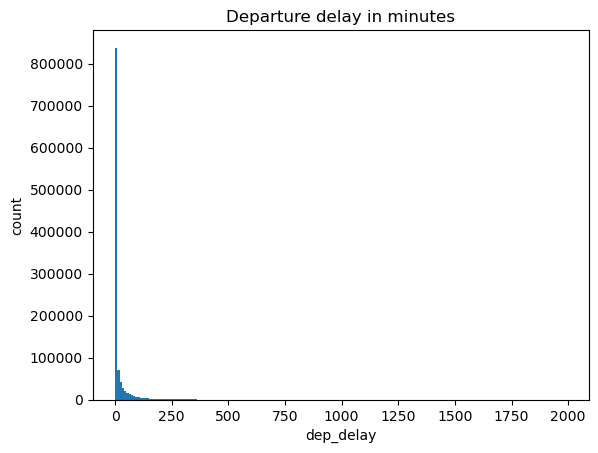

In [235]:
plt.hist(flight_df['dep_delay'], bins = range(0, 2000, 10) )

plt.xlabel('dep_delay')
plt.ylabel('count')
plt.title('Departure delay in minutes')
plt.show()

 Tutaj stwórz wykres dla `dep_delay` używając warunku `dep_delay > 0`

In [236]:
flight_df_non_0 = flight_df.loc[flight_df['dep_delay'] > 0]
flight_df_non_0

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,138.0,149.0,606.0,3,NaN,NaN,NaN,NaN,NaN,2019
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,150.0,140.0,946.0,4,5.0,0.0,0.0,0.0,17.0,2019
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,150.0,128.0,946.0,4,84.0,0.0,0.0,0.0,12.0,2019
2456,155244,1,2,3,WN,N929WN,2792,10397,10821,1505,...,105.0,101.0,577.0,3,NaN,NaN,NaN,NaN,NaN,2019
2457,155245,1,2,3,WN,N294WN,3801,10397,10821,2015,...,110.0,93.0,577.0,3,24.0,0.0,0.0,0.0,12.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384538,1537327,12,11,3,DL,N363DN,1795,13303,10397,1500,...,114.0,101.0,594.0,3,0.0,0.0,0.0,0.0,29.0,2019
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019


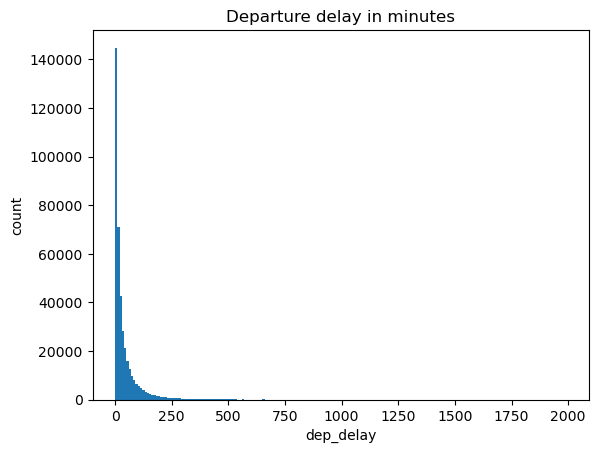

In [237]:
plt.hist(flight_df_non_0['dep_delay'], bins = range(0, 2000, 10) )

plt.xlabel('dep_delay')
plt.ylabel('count')
plt.title('Departure delay in minutes')
plt.show()

 Tutaj stwórz wykres dla `dep_delay` używając warunków `dep_delay > 0` oraz `dep_delay < percentile 95%`

In [238]:
flight_df_combined = flight_df.loc[
    (flight_df['dep_delay'] > 0) &
    (flight_df['dep_delay'] < flight_df['dep_delay'].quantile(0.95))
]
flight_df_combined

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,138.0,149.0,606.0,3,NaN,NaN,NaN,NaN,NaN,2019
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,150.0,140.0,946.0,4,5.0,0.0,0.0,0.0,17.0,2019
2456,155244,1,2,3,WN,N929WN,2792,10397,10821,1505,...,105.0,101.0,577.0,3,NaN,NaN,NaN,NaN,NaN,2019
2457,155245,1,2,3,WN,N294WN,3801,10397,10821,2015,...,110.0,93.0,577.0,3,24.0,0.0,0.0,0.0,12.0,2019
2458,155246,1,2,3,WN,N413WN,4705,10397,10821,1750,...,105.0,93.0,577.0,3,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384538,1537327,12,11,3,DL,N363DN,1795,13303,10397,1500,...,114.0,101.0,594.0,3,0.0,0.0,0.0,0.0,29.0,2019
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019


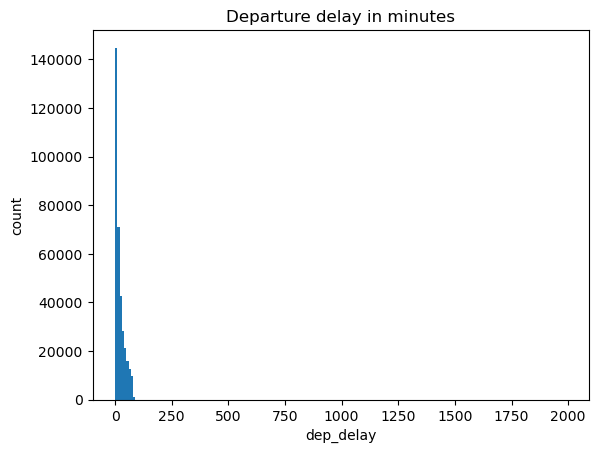

In [239]:
plt.hist(flight_df_combined['dep_delay'], bins = range(0, 2000, 10) )

plt.xlabel('dep_delay')
plt.ylabel('count')
plt.title('Departure delay in minutes')
plt.show()

 # Analiza opóźnień
 Zdefiniuj w ramce `flight_df` nową kolumnę - `is_delayed` jako te opóźnienia, które wynosiły więcej niż `(>)` 15 minut.

 Zgodnie z powyższą definicją, wyznacz jaki procent wszystkich lotów był opóźniony. Wynik zapisz do zmiennej `delayed_ratio` z dokładnością do dwóch miejsc po przecinku. Postaraj się, aby wartość tej zmiennej nie była zapisana ręcznie.

 Tutaj stwórz nową kolumnę `is_delayed` oraz odpowiednio ją uzupełnij

In [240]:
flight_df['is_delayed'] = flight_df['dep_delay'] > 15
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,149.0,606.0,3,NaN,NaN,NaN,NaN,NaN,2019,False
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,140.0,946.0,4,5.0,0.0,0.0,0.0,17.0,2019,True
2453,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,127.0,946.0,4,NaN,NaN,NaN,NaN,NaN,2019,False
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,128.0,946.0,4,84.0,0.0,0.0,0.0,12.0,2019,True
2455,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,123.0,577.0,3,0.0,0.0,16.0,0.0,0.0,2019,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True
1384541,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True


 Tutaj zdefiniuj oraz wyznacz wartość dla zmiennej `delayed_ratio`

In [241]:
delayed_ratio = (flight_df['is_delayed'].loc[flight_df['is_delayed'] == True].count() / flight_df['is_delayed'].count()).round(2)
delayed_ratio

0.19

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [242]:
delayed_ratio_expected = 0.19
assert delayed_ratio == delayed_ratio_expected, f"Oczekiwanio {delayed_ratio_expected}, otrzymano {delayed_ratio}"

 # Opóźnienia vs. miesiąc kalendarzowy
 Zbadaj, jak zmienia się odsetek opóźnień w zależności od **miesiąca kalendarzowego**. Zadanie wykonaj w dwóch krokach:
 1. stwórz zmienną `flight_delays_by_month_df` używając metody `groupby`,
 1. na podstawie zmiennej `flight_delays_by_month_df`, wygeneruj odpowiedni wykres zgodnie z dobrymi praktykami.

W trakcie pracy nad tym zadaniem możesz posłużyć się następującymi materiałami z `LMS`:
 - `Python - analiza danych -> Dzień 5 - Pandas -> Grupowanie`
 - `groupby`- dokumentacja metody `Pandas`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

 Tutaj pogrupuj dane, a wyniki zapisz do ramki `flight_delays_by_month_df`

In [243]:
flight_delayed_df = flight_df.loc[flight_df['is_delayed'] == True]
flight_delayed_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,140.0,946.0,4,5.0,0.0,0.0,0.0,17.0,2019,True
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,128.0,946.0,4,84.0,0.0,0.0,0.0,12.0,2019,True
2457,155245,1,2,3,WN,N294WN,3801,10397,10821,2015,...,93.0,577.0,3,24.0,0.0,0.0,0.0,12.0,2019,True
2459,155247,1,2,3,WN,N7718B,4771,10397,10821,945,...,101.0,577.0,3,NaN,NaN,NaN,NaN,NaN,2019,True
2465,155253,1,2,3,WN,N740SW,6626,10397,11278,2200,...,99.0,547.0,3,0.0,0.0,0.0,0.0,40.0,2019,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384533,1537322,12,11,3,DL,N343DN,1455,13303,12953,1458,...,155.0,1096.0,5,0.0,0.0,29.0,0.0,0.0,2019,True
1384535,1537324,12,11,3,DL,N327DN,1469,13303,12953,1702,...,166.0,1096.0,5,0.0,0.0,8.0,0.0,21.0,2019,True
1384538,1537327,12,11,3,DL,N363DN,1795,13303,10397,1500,...,101.0,594.0,3,0.0,0.0,0.0,0.0,29.0,2019,True
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True


In [244]:
flight_delays_by_month_df = (flight_delayed_df.groupby('month')['is_delayed'].count() / flight_df.groupby('month')['is_delayed'].count()).round(2).to_frame().reset_index()
flight_delays_by_month_df 

,month,is_delayed
0,1,0.18
1,2,0.22
2,3,0.18
3,4,0.18
4,5,0.20
5,6,0.25
6,7,0.22
7,8,0.21
8,9,0.15
9,10,0.16


In [245]:
flight_delays_by_month_df['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

 Tutaj narysuj wykres, używając danych z ramki `flight_delays_by_month_df`

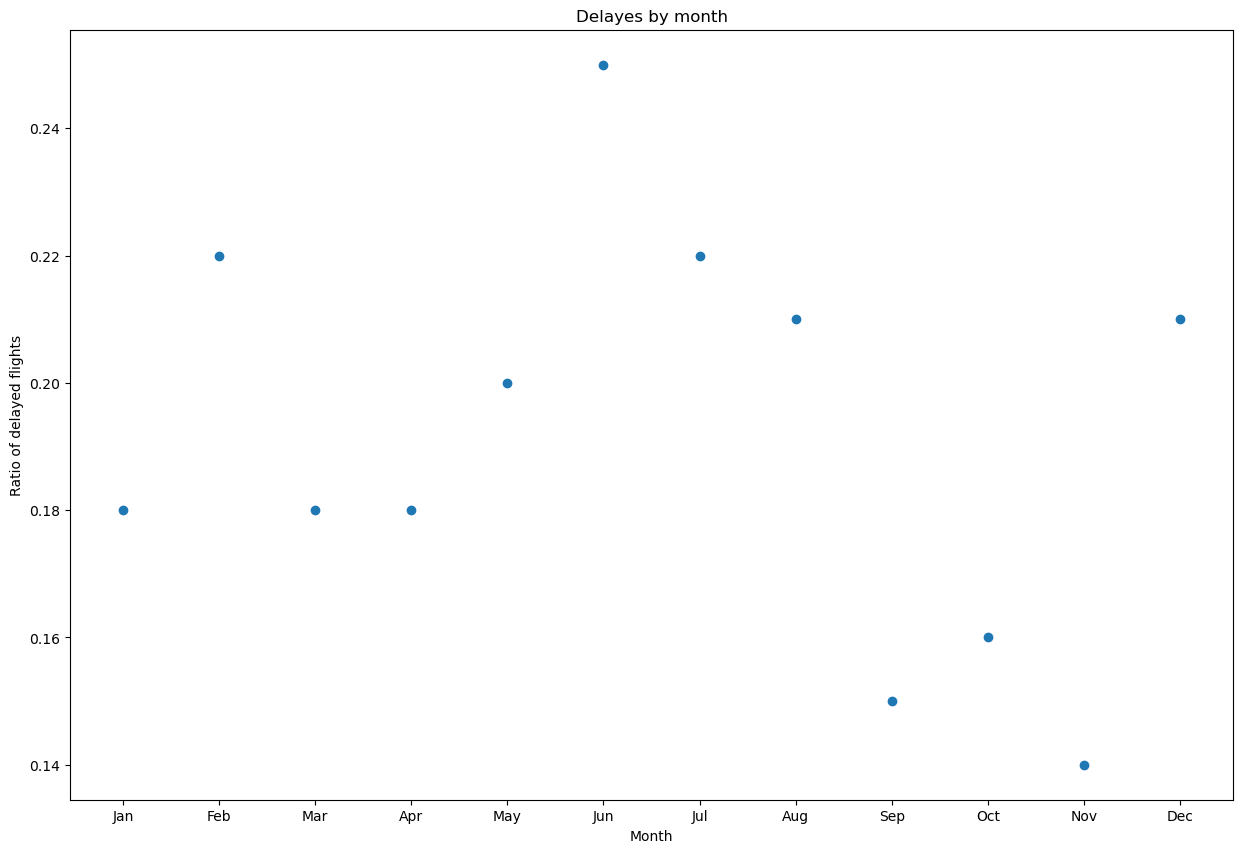

In [344]:
plt.figure(figsize = (15,10))

plt.scatter(flight_delays_by_month_df['month'], flight_delays_by_month_df['is_delayed'] )

plt.title('Delayes by month')
plt.ylabel(ylabel='Ratio of delayed flights')
plt.xlabel(xlabel='Month')
plt.xticks(flight_delays_by_month_df['month'])

plt.show()

 # Opóźnienia vs. dzień tygodnia cz. 1
 Zbadaj, jak zmienia się odsetek opóźnień w zależności od **dnia tygodnia**. Zadanie wykonaj w dwóch krokach:
 1. stwórz zmienną `flight_delays_by_weekday_df` używając metody `groupby`,
 1. na podstawie zmiennej `flight_delays_by_weekday_df`, wygeneruj odpowiedni wykres zgodnie z dobrymi praktykami.

 Tutaj pogrupuj dane

In [247]:
flight_delays_by_weekday_df = (flight_delayed_df.groupby('day_of_week')['is_delayed'].count() / flight_df.groupby('day_of_week')['is_delayed'].count()).round(2).to_frame().reset_index()
flight_delays_by_weekday_df

,day_of_week,is_delayed
0,1,0.20
1,2,0.17
2,3,0.18
3,4,0.21
4,5,0.20
5,6,0.17
6,7,0.19


In [248]:
flight_delays_by_weekday_df['day_of_week'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

 Tutaj narysuj wykres

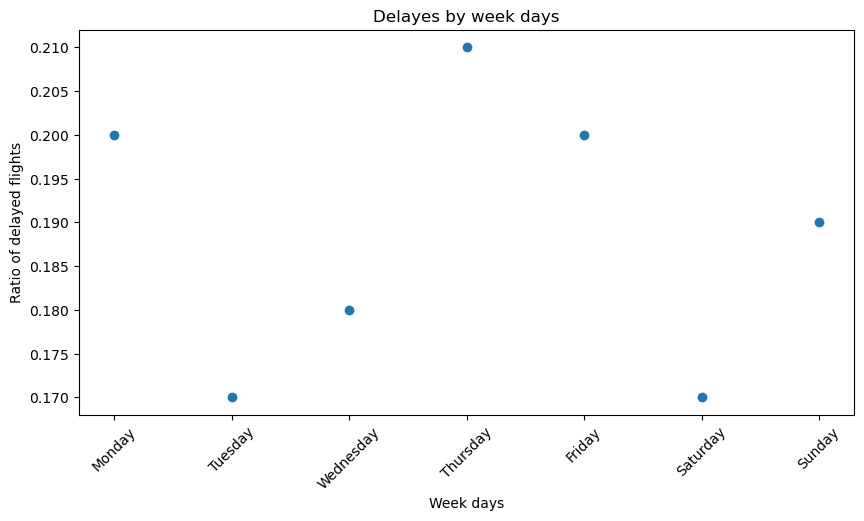

In [345]:
plt.figure(figsize = (10,5))

plt.scatter(flight_delays_by_weekday_df['day_of_week'], flight_delays_by_weekday_df ['is_delayed'] )

plt.title('Delayes by week days')
plt.ylabel(ylabel='Ratio of delayed flights')
plt.xlabel(xlabel='Week days')
plt.xticks(flight_delays_by_weekday_df['day_of_week'], rotation=45)

plt.show()

 # Opóźnienia vs. dzień tygodnia cz. 2
 Dokonaj agregacji kolumny `day_of_week` do nowej kolumny `is_weekend` w `flight_df`. Jako weekend przyjmij wartości 6, 7.
 1. Używając grupowania, wyznacz odsetek opóźnień w zależności od tego, czy lot odbywał się w weekend czy nie. Wyniki zapisz do ramki `flight_delays_by_weekend_df` oraz zaokrąglij do dwóch miejsc po przecinku.
 1. Zaprezentuj graficznie wynik analizy.
 1. Czy Twoim zdaniem odsetek opóźnień jest zależny od tego, czy lot odbywał się w weekend? Uzasadnij.

 Tutaj dodaj nową kolumnę `is_weekend` do `flight_df`

In [251]:
flight_df['is_weekend'] = flight_df['day_of_week'].apply(lambda x: x in [6, 7])
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,606.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,946.0,4,5.0,0.0,0.0,0.0,17.0,2019,True,False
2453,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,946.0,4,NaN,NaN,NaN,NaN,NaN,2019,False,False
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,946.0,4,84.0,0.0,0.0,0.0,12.0,2019,True,False
2455,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,577.0,3,0.0,0.0,16.0,0.0,0.0,2019,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False
1384541,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False


In [252]:
flight_delayed_df['is_weekend'] = flight_delayed_df['day_of_week'].apply(lambda x: x in [6, 7])
flight_delayed_df

C:\Users\urszu\AppData\Local\Temp\ipykernel_10380\2811745863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_delayed_df['is_weekend'] = flight_delayed_df['day_of_week'].apply(lambda x: x in [6, 7])


,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,946.0,4,5.0,0.0,0.0,0.0,17.0,2019,True,False
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,946.0,4,84.0,0.0,0.0,0.0,12.0,2019,True,False
2457,155245,1,2,3,WN,N294WN,3801,10397,10821,2015,...,577.0,3,24.0,0.0,0.0,0.0,12.0,2019,True,False
2459,155247,1,2,3,WN,N7718B,4771,10397,10821,945,...,577.0,3,NaN,NaN,NaN,NaN,NaN,2019,True,False
2465,155253,1,2,3,WN,N740SW,6626,10397,11278,2200,...,547.0,3,0.0,0.0,0.0,0.0,40.0,2019,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384533,1537322,12,11,3,DL,N343DN,1455,13303,12953,1458,...,1096.0,5,0.0,0.0,29.0,0.0,0.0,2019,True,False
1384535,1537324,12,11,3,DL,N327DN,1469,13303,12953,1702,...,1096.0,5,0.0,0.0,8.0,0.0,21.0,2019,True,False
1384538,1537327,12,11,3,DL,N363DN,1795,13303,10397,1500,...,594.0,3,0.0,0.0,0.0,0.0,29.0,2019,True,False
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False


 Tutaj dokonaj agregacji danych do ramki `flight_delays_by_weekend_df`

In [258]:
flight_delays_by_weekend_df  = (flight_delayed_df.groupby('is_weekend')['is_delayed'].count() / flight_df.groupby('is_weekend')['is_delayed'].count()).round(2).to_frame().reset_index()
flight_delays_by_weekend_df

,is_weekend,is_delayed
0,False,0.19
1,True,0.18


In [259]:
flight_delays_by_weekend_df['is_weekend'] = ['weekday', 'weekend']

 Tutaj narysuj wykres używając danych z ramki `flight_delays_by_weekend_df`

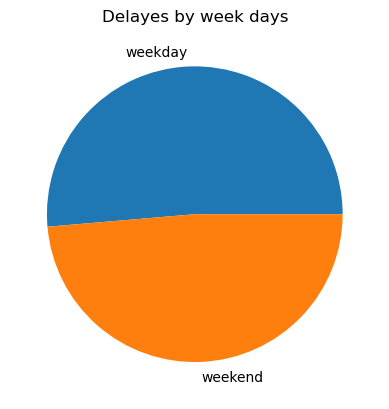

In [346]:
plt.pie(flight_delays_by_weekend_df['is_delayed'], labels=flight_delays_by_weekend_df['is_weekend'])
plt.title('Delayes by week days')
plt.show()

Odsetek opoźnień w weekend jak i w dni powszednie jest bardzo zbliżony. Dlatego uważam, że nie ma większego znaczenia czy lot odbył się w weekend czy w tygodniu.

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [283]:
expected_flight_df_by_weekend = {0: 0.19, 1: 0.18}
assert flight_delays_by_weekend_df.to_dict(
) == expected_flight_df_by_weekend, f'Spodziewano się wyników: {expected_flight_df_by_weekend}\n otrzymano  {flight_delays_by_weekend_df}'

AssertionError: Spodziewano się wyników: {0: 0.19, 1: 0.18}
 otrzymano    is_weekend  is_delayed
0    weekday        0.19
1    weekend        0.18

 # Opóźnienia vs. odległość lotu
 Przeanalizuj kolumnę `distance`, wykonując poniższe polecenia:  
 1. Podobnie jak dla zmiennej `dep_delay`, wyznacz statystyki opisowe oraz dodatkowo przedstaw percentyle `[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]`. Wynik zapisz do zmiennej `flight_distance_analysis_df` oraz zaokrąglij do dwóch miejsc po przecinku.  
 2. Nakreśl wykres punktowy (`scatter`) używając `distance` oraz `dep_delay`. Narysuj wykres dla losowych 10 tysięcy wierszy. Czy na takim wykresie możesz coś zaobserwować?  
 3. Usuń z ramki `flight_df`, te wiersze, dla których `distance` jest powyżej 95% percentyla.  
 4. Używając ramki `flight_df`, dokonaj agregacji zmiennej `distance` co 100 mil do nowej kolumny `distance_agg` oraz wyznacz odsetek opóźnień w każdym koszyku. Wynik zapisz do ramki o nazwie `flight_delays_by_distance_agg_df`.  
 5. Narysuj wykres słupkowy, używając danych zapisanych w `flight_delays_by_distance_agg_df`.  
 6. Czy Twoim zdaniem większy dystans oznacza większe prawdopodobieństwo opóźnienia lotu? Uzasadnij.

 Wskazówka:
 - Przy generowaniu losowych wierszy przyda sie link do dokumentacji metody `sample`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)
 - Przy generowaniu grup przyda się link do dokumentacji metody `cut`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

 > Dla dużych zbiorów danych kreślenie wszystkich danych mija się z celem ze względu na czytelność. Mimo że zaprezentujemy pewną część zbioru, zakładamy, że danych na wykresie jest na tyle dużo, że stanowią one reprezentacyjną próbkę populacji.

 Tutaj dokonaj agregacji danych do ramki `flight_distance_analysis_df`

In [315]:
flight_distance_analysis_df = flight_df['distance'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2).to_frame()  
flight_distance_analysis_df

,distance
count,1095742.00
mean,758.08
std,600.43
min,100.00
10%,216.00
25%,337.00
50%,606.00
75%,937.00
90%,1721.00
95%,2475.00


In [343]:
random = flight_df.sample(n = 1000)
random

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend
9416,401192,6,10,1,WN,N552WN,41,11259,12191,1630,...,239.0,1,NaN,NaN,NaN,NaN,NaN,2019,True,False
784896,937680,1,3,4,DL,N986AT,2566,12892,11292,1412,...,862.0,4,NaN,NaN,NaN,NaN,NaN,2019,False,False
554979,707732,9,20,5,YX,N640RW,3665,11278,13930,2045,...,612.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False
259084,257652,10,23,3,AA,N738US,1550,10397,11057,2020,...,226.0,1,NaN,NaN,NaN,NaN,NaN,2019,False,False
913432,1066223,2,13,3,HA,N484HA,342,12173,12402,1505,...,216.0,1,NaN,NaN,NaN,NaN,NaN,2019,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380041,1532836,8,7,3,DL,N371DN,940,13303,10397,600,...,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False
30166,421923,4,17,3,UA,N587UA,2006,11618,14771,1800,...,2565.0,11,NaN,NaN,NaN,NaN,NaN,2019,True,False
936463,1089257,10,15,2,HA,N494HA,188,12173,12758,849,...,163.0,1,NaN,NaN,NaN,NaN,NaN,2019,False,False
202971,201537,5,29,3,DL,N980AT,380,10397,11618,745,...,746.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False


 Tutaj narysuj wykres dla 10 000 losowych wierszy z tabeli `flight_df`

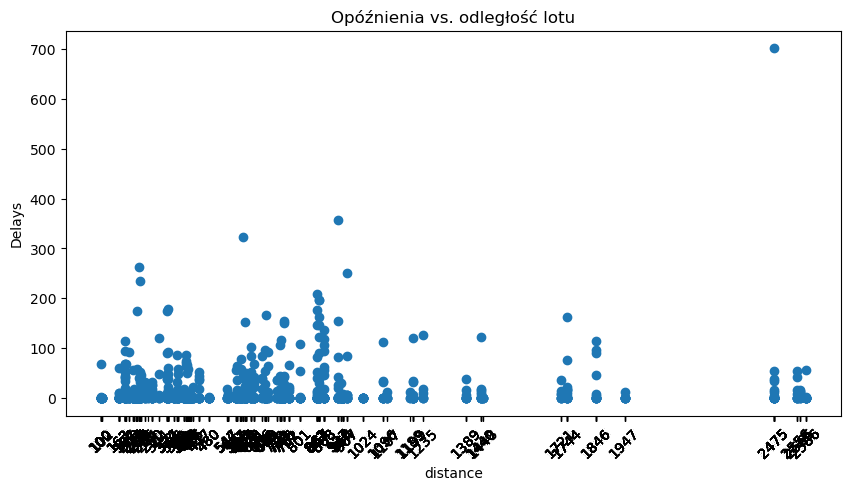

In [347]:
plt.figure(figsize = (10,5))

plt.scatter(random['distance'], random['dep_delay'] )

plt.title('Opóźnienia vs. odległość lotu')
plt.ylabel(ylabel='Delays')
plt.xlabel(xlabel='distance')
plt.xticks(random['distance'], rotation=45)

plt.show()

 Tutaj usuń z ramki `flight_df` wiersze, dla których `distance` jest powyżej `95% percentyla` (> 95%)

In [351]:
flight_df = flight_df.loc[~(flight_df['distance'] > flight_df['distance'].quantile(0.95))]
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,606.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,946.0,4,5.0,0.0,0.0,0.0,17.0,2019,True,False
2453,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,946.0,4,NaN,NaN,NaN,NaN,NaN,2019,False,False
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,946.0,4,84.0,0.0,0.0,0.0,12.0,2019,True,False
2455,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,577.0,3,0.0,0.0,16.0,0.0,0.0,2019,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False
1384541,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False


In [354]:
flight_df['distance'].max()

2475.0

### Sprawdzenie

In [353]:
flight_df_expected_rows_amount = 1057391
flight_df_rows_amount = flight_df.shape[0]

assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

 Tutaj dokonaj agregacji zmiennej `distance` oraz wyznacz odsetek opóźnień

In [371]:
bins = range(0, int(flight_df['distance'].max()) + 100, 100)
bins

range(0, 2575, 100)

In [372]:
flight_df['distance_agg'] = pd.cut(flight_df['distance'], bins = bins)
flight_df

C:\Users\urszu\AppData\Local\Temp\ipykernel_10380\3997289186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df['distance_agg'] = pd.cut(flight_df['distance'], bins = bins)


,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(600, 700]"
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,4,5.0,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]"
2453,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,4,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(900, 1000]"
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,4,84.0,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]"
2455,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,3,0.0,0.0,16.0,0.0,0.0,2019,False,False,"(500, 600]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]"
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]"
1384541,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]"
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]"


In [373]:
flight_delayed_2_df = flight_df.loc[flight_df['is_delayed'] == True]
flight_delayed_2_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,4,5.0,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]"
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,4,84.0,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]"
2457,155245,1,2,3,WN,N294WN,3801,10397,10821,2015,...,3,24.0,0.0,0.0,0.0,12.0,2019,True,False,"(500, 600]"
2459,155247,1,2,3,WN,N7718B,4771,10397,10821,945,...,3,NaN,NaN,NaN,NaN,NaN,2019,True,False,"(500, 600]"
2465,155253,1,2,3,WN,N740SW,6626,10397,11278,2200,...,3,0.0,0.0,0.0,0.0,40.0,2019,True,False,"(500, 600]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384533,1537322,12,11,3,DL,N343DN,1455,13303,12953,1458,...,5,0.0,0.0,29.0,0.0,0.0,2019,True,False,"(1000, 1100]"
1384535,1537324,12,11,3,DL,N327DN,1469,13303,12953,1702,...,5,0.0,0.0,8.0,0.0,21.0,2019,True,False,"(1000, 1100]"
1384538,1537327,12,11,3,DL,N363DN,1795,13303,10397,1500,...,3,0.0,0.0,0.0,0.0,29.0,2019,True,False,"(500, 600]"
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]"


In [374]:
flight_delays_by_distance_agg_df = (flight_delayed_2_df.groupby('distance_agg')['dep_delay'].count() / flight_df.groupby('distance_agg')['dep_delay'].count()).round(2).to_frame().reset_index()
flight_delays_by_distance_agg_df

,distance_agg,dep_delay
0,"(0, 100]",0.06
1,"(100, 200]",0.17
2,"(200, 300]",0.18
3,"(300, 400]",0.20
4,"(400, 500]",0.17
5,"(500, 600]",0.17
6,"(600, 700]",0.20
7,"(700, 800]",0.24
8,"(800, 900]",0.21
9,"(900, 1000]",0.22


 Tutaj narysuj wykres słupkowy używając danych zapisanych w `flight_delays_by_distance_agg_df`

<Figure size 1500x1000 with 0 Axes>

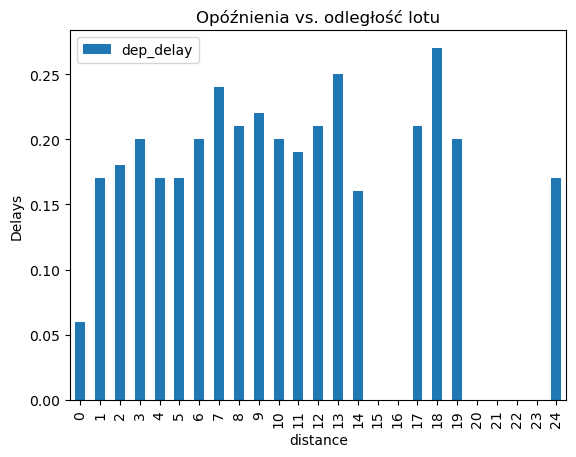

In [395]:
plt.figure(figsize=(15,10))
 
x = str(flight_delays_by_distance_agg_df['distance_agg'])
y = flight_delays_by_distance_agg_df['dep_delay']
    
flight_delays_by_distance_agg_df.plot(kind='bar')
plt.title('Opóźnienia vs. odległość lotu')
plt.ylabel(ylabel='Delays')
plt.xlabel(xlabel='distance')

plt.show()

Dystans nie wpływa znacząco na opóźnienia. 
Jedynie opóźnienie na krótkiej trasie (do 100 km) odbiega od reszty danych (jest wyjątkowo niskie). Powyżej 100 km opóźnienie jest na podobnym poziomie i nie rośnie znacząco wraz z długością trasy.


 ## Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [397]:
assert 'distance_agg' in flight_df.columns, 'Nie odnaleziono kolumny distance_agg w ramce flight_df'

 # Opóźnienia vs. grupa odległości
 Przeanalizuj kolumnę `distance_group` dostępą w zbiorze danych oraz odpowiedz na poniższe:  
 1. Dla jakich odcinków zostały wyznaczone poszczególne grupy? Wyznacz maksymalną oraz minimalną `distance` wartość w poszczególnych grupach. Wynik zapisz do ramki `flight_distance_by_distance_group`.  
 2. Wyznacz prawdopodobieństwo opóźnienia przy użyciu tych grup. Wynik zapisz do ramki `flight_delays_by_distance_group_df`.  
 3. Używając ramki `flight_delays_by_distance_group_df`, wykreśl odpowiedni wykres wizualizujący dane.  
 4. Na ile zbieżne są wyniki tej analizy z tą wykonaną w poprzednim punkcie?

Wskazówka do punktu pierwszego:
 - Do agregacji danych przyda się metoda `agg`: `Python - analiza danych -> Dzień 5 - Pandas -> Grupowanie`
 - Dokumentacja metody `agg`: [klik](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)

Tutaj wyznacz odcinki, dla których zostały wyznaczone poszczególne grupy

In [425]:
flight_distance_by_distance_group = flight_df.groupby('distance_agg').agg({'distance' : ['min', 'max']}).reset_index()
flight_distance_by_distance_group

distance_agg distance        
                      min     max
0       (0, 100]    100.0   100.0
1     (100, 200]    102.0   200.0
2     (200, 300]    214.0   280.0
3     (300, 400]    304.0   399.0
4     (400, 500]    404.0   480.0
5     (500, 600]    544.0   594.0
6     (600, 700]    602.0   689.0
7     (700, 800]    719.0   762.0
8     (800, 900]    801.0   888.0
9    (900, 1000]    937.0   967.0
10  (1000, 1100]   1024.0  1096.0
11  (1100, 1200]   1107.0  1199.0
12  (1200, 1300]   1235.0  1235.0
13  (1300, 1400]   1389.0  1389.0
14  (1400, 1500]   1440.0  1448.0
15  (1500, 1600]      NaN     NaN
16  (1600, 1700]      NaN     NaN
17  (1700, 1800]   1721.0  1744.0
18  (1800, 1900]   1846.0  1846.0
19  (1900, 2000]   1947.0  1947.0
20  (2000, 2100]      NaN     NaN
21  (2100, 2200]      NaN     NaN
22  (2200, 2300]      NaN     NaN
23  (2300, 2400]      NaN     NaN
24  (2400, 2500]   2475.0  2475.0

 Tutaj wyznacz odsetek opóźnień w każdej grupie zapisując wyniki do ramki `flight_delays_by_distance_group_df`

In [442]:
delayed_flights = flight_df.groupby('distance_agg').agg({'dep_delay' : ['sum', 'count']}).reset_index()
delayed_flights

distance_agg  dep_delay        
                        sum   count
0       (0, 100]    76834.0   21443
1     (100, 200]  1026647.0   71037
2     (200, 300]  1833520.0  132630
3     (300, 400]  1741023.0  119149
4     (400, 500]  1197847.0  102970
5     (500, 600]   968891.0   81201
6     (600, 700]  1876248.0  124170
7     (700, 800]  1710874.0   84422
8     (800, 900]  1359892.0   82012
9    (900, 1000]   957934.0   54411
10  (1000, 1100]   359444.0   24898
11  (1100, 1200]   378321.0   29453
12  (1200, 1300]   219220.0   14402
13  (1300, 1400]   266982.0   12831
14  (1400, 1500]   269402.0   24711
15  (1500, 1600]        0.0       0
16  (1600, 1700]        0.0       0
17  (1700, 1800]   456717.0   26906
18  (1800, 1900]   284507.0   12506
19  (1900, 2000]   149078.0   12706
20  (2000, 2100]        0.0       0
21  (2100, 2200]        0.0       0
22  (2200, 2300]        0.0       0
23  (2300, 2400]        0.0       0
24  (2400, 2500]   349893.0   25533

In [455]:
delayed_flights['delayed_flights'] = (delayed_flights['dep_delay']['sum'] / delayed_flights['dep_delay']['count']).round(2)
delayed_flights2 = delayed_flights['delayed_flights'].to_frame() 
delayed_flights2 

,delayed_flights
0,3.58
1,14.45
2,13.82
3,14.61
4,11.63
5,11.93
6,15.11
7,20.27
8,16.58
9,17.61


In [472]:
flight_delays_by_distance_group_df = pd.concat([delayed_flights['distance_agg'], delayed_flights2['delayed_flights'] ], axis=1)
flight_delays_by_distance_group_df 

,distance_agg,delayed_flights
0,"(0, 100]",3.58
1,"(100, 200]",14.45
2,"(200, 300]",13.82
3,"(300, 400]",14.61
4,"(400, 500]",11.63
5,"(500, 600]",11.93
6,"(600, 700]",15.11
7,"(700, 800]",20.27
8,"(800, 900]",16.58
9,"(900, 1000]",17.61


 Tutaj narysuj wykres przy użyciu ramki `flight_delays_by_distance_group_df`

<Figure size 1000x500 with 0 Axes>

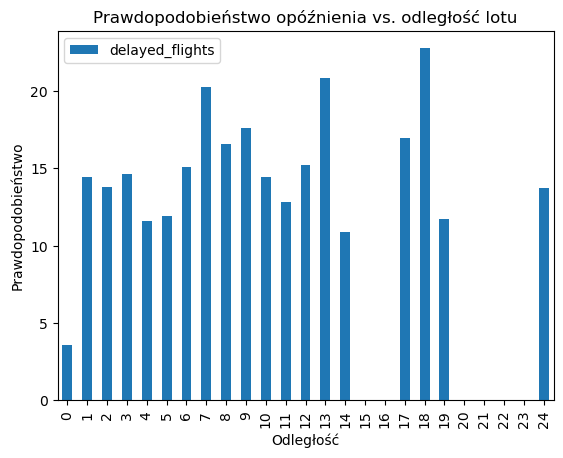

In [481]:
plt.figure(figsize = (10,5))

flight_delays_by_distance_group_df.plot(kind='bar')
plt.title('Prawdopodobieństwo opóźnienia vs. odległość lotu')
plt.ylabel(ylabel='Prawdopodobieństwo')
plt.xlabel(xlabel='Odległość')
plt.xticks = (flight_delays_by_distance_group_df['distance_agg'])

plt.show()

 ## Czy większy dystans oznacza większe prawdopodobieństwo opóźnenia lotu?
 Miejsce na Twój komentarz - czy wykresy można porównać? Czy dają takie same wnioski?

> Wyniki są zbieżne ze wcześniejszym wykresem. 
Dystans nie wpływa znacząco na opóźnienia. 
Jedynie opóźnienie na krótkiej trasie (do 100 km) odbiega od reszty danych (jest wyjątkowo niskie). Powyżej 100 km nie ma zależności pomiędzy odległością a opóźnieniem.

 # Podsumowanie
 W tym notatniku dość dokładnie przeanalizowaliśmy ramkę `fligh_delays` bez wzbogacania jej o dodatkowe dane z innych źródeł, takich jak dane pogodowe.

 Zanim przejdziemy dalej, należy zapisać bieżącą postać ramki (najlepiej lokalnie), która zostanie użyta w kolejnym notatniku.

 > **Wskazówka:**  
 > Aby uniknąć potencjalnych problemów, najlepiej zapisać ramkę w sposób nawiązujący do tego notatnika, np. `flight_df_01`.

 Tutaj zapisz ramkę w najdogodniejszy sposób.

In [482]:
flight_df_01 = flight_df
flight_df_01

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg
2450,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(600, 700]"
2452,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,4,5.0,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]"
2453,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,4,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(900, 1000]"
2454,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,4,84.0,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]"
2455,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,3,0.0,0.0,16.0,0.0,0.0,2019,False,False,"(500, 600]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384539,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]"
1384540,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]"
1384541,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]"
1384542,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]"


In [483]:
flight_df.to_csv(r'C:\Users\urszu\OneDrive\Pulpit\CodersLab - cwiczenia\Projekt koncowy\data\processed\flight_df_01.csv', index=False)